In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.autograd import Variable
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import pandas as pd
print(os.listdir("../input"))
np.random.seed(3)
# Any results you write to the current directory are saved as output.

['mnist_train.csv', 'mnist_test.csv']


In [2]:
#set the hyperparameters
input_dim = 784
output_dim = 10
l_rate = 0.01

In [3]:
class LogisticRegressionModel():
    def __init__(self, input_dim, output_dim):
        #first initialize weight array
        #self.W = np.random.randn(input_dim, output_dim)
        self.W = np.random.randn(input_dim, output_dim)
        self.b = np.zeros(output_dim)
        
    def forward(self, x):
        weighted_sum = np.dot(x, self.W) + self.b
        out = self.sigmoid(weighted_sum) #logistic activation function
        return out
    
    def predict(self, x):
        out = self.forward(x)
        largest_index = np.argmax(out)
        result = np.zeros((np.shape(out)[0]))
        result[largest_index] = 1
        return result
    
    def sigmoid(self, weighted_sum):
        return 1 / (1 + np.exp(-weighted_sum))
    
    def MSEloss(self, activation, teacher):
        return np.square(np.subtract(activation, teacher)).mean()
    
    def backprop(self, activation, teacher, inputs, l_rate):

        #will be of shape --- batchsize, output_dim
        loss = np.subtract(activation, teacher)
        #print('calculated loss: {}'.format(loss))
        
        #CAREFUL MAYBE DOUBLE USING DOUBLE ACTIVATION !!!!
        #will be of shape --- batchsize, output_dim
        derivativess = self.sigmoid(activation) * (1 - self.sigmoid(activation))
        #print('sigmoided activation1: {}'.format(derivativess))
        #derivativess = (activation) * (1 - (activation))
        #print('sigmoided activation2: {}'.format(derivativess))
        #print('sigmoided activation: {}'.format(derivativess))
        
        dA = loss * derivativess
        #print('dA: {}'.format(dA))
        #print('inputs: {}'.format(inputs))
        #print('inputs.T: {}'.format(inputs.T))
        #print('shape of inputs.T: {}'.format(np.shape(inputs.T)))
        dW = np.dot(inputs.T,dA)
        dW = -(dW * l_rate)
        
        dB = np.sum(dA)
        #print('dW: {}'.format(dW))
        return dW, dB
    
    #delta_w is of shape: (batchsize, W_dim)
    def update_weights(self, delta_w, delta_b): 
        self.W = self.W + delta_w
        self.b = self.b + delta_b
        return
    
    def accuracy(self, model, x_val, y_val, is_val):
        correct = 0
        for index in range(0,np.shape(x_val)[0]):
            #index = np.random.randint(low=0,high=10000)
            #image = x_val[index]
            #image = np.reshape(image, (28,28))
            prediction = model.predict(x_val[index])
            label = y_val[index]
            is_equal = np.array_equal(prediction, label)
            if is_equal:
                correct += 1
        if is_val:
            print("Accuracy on validation set: {}".format(correct/np.shape(x_val)[0]))
        else:
            print("Accuracy on training set: {}".format(correct/np.shape(x_val)[0]))
        return (correct/np.shape(x_val)[0])
            #print(is_equal)
            #title = "Predicted label: {} \n Actual label: {}".format(prediction, label)
            #plt.imshow(image)
            #plt.title(title)
            #plt.show()

    
    def train(self, x_train, y_train, x_val, y_val, epochs, batchsize=20):
        
        history_val = []
        history_train = []
        for i in range(epochs):
            activation = self.forward(x_train)
            dW, dB = self.backprop(activation, y_train, x_train, l_rate)
            self.update_weights(dW, dB)
            calculated_loss = self.MSEloss(activation, y_train)
            print('Iteration: {} calculated loss: {}'.format(i,calculated_loss))
            if i % 4 == 0:
                history_val.append(self.accuracy(model, x_val, y_val, True))
                history_train.append(self.accuracy(model, x_train, y_train, False))
        
        
        plt.plot(history_val,color='red',)
        plt.plot(history_train, color='blue')
        plt.show()
        return 
    

In [4]:
train_x = pd.read_csv('../input/mnist_train.csv')
train_y = train_x['label']
b = np.zeros((60000, 10))
b[np.arange(60000), train_y] = 1
train_y = b

test_x = pd.read_csv('../input/mnist_test.csv')
test_y = test_x['label']
b = np.zeros((60000, 10))
b[np.arange(10000), test_y] = 1
test_y = b

train_x.drop(['label'], axis=1, inplace=True)
test_x.drop(['label'], axis=1, inplace=True)

train_x = train_x.values
test_x = test_x.values

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


[34620.04480204 34620.04480204 34620.04480204 34620.04480204
 34620.04480204 34620.04480204 34620.04480204 34620.04480204
 34620.04480204 34620.04480204]
Iteration: 0 calculated loss: 0.45081432474445543
Accuracy on validation set: 0.0912
Accuracy on training set: 0.09321666666666667
[55991.03220772 55991.03220772 55991.03220772 55991.03220772
 55991.03220772 55991.03220772 55991.03220772 55991.03220772
 55991.03220772 55991.03220772]
Iteration: 1 calculated loss: 0.34127
[60597.84832593 60597.84832593 60597.84832593 60597.84832593
 60597.84832593 60597.84832593 60597.84832593 60597.84832593
 60597.84832593 60597.84832593]
Iteration: 2 calculated loss: 0.21538
[47723.09120248 47723.09120248 47723.09120248 47723.09120248
 47723.09120248 47723.09120248 47723.09120248 47723.09120248
 47723.09120248 47723.09120248]
Iteration: 3 calculated loss: 0.093835
[35669.75652379 35669.75652379 35669.75652379 35669.75652379
 35669.75652379 35669.75652379 35669.75652379 35669.75652379
 35669.75652379 

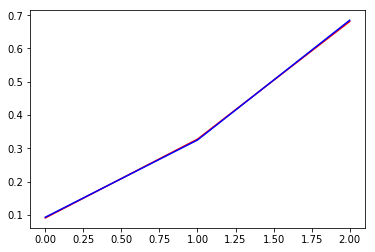

In [5]:
model = LogisticRegressionModel(input_dim, output_dim)
model.train(train_x,train_y, test_x, test_y, 10,20)

In [6]:
'''
        out = self.forward(x)
        print(out)
        largest_index = np.argmax(out)
        print(largest_index)
        print(np.shape(x))
        result = np.zeros((np.shape(out)[1]))
        print(result)
        result[largest_index] = 1
        print(result)
        return result'''

'\n        out = self.forward(x)\n        print(out)\n        largest_index = np.argmax(out)\n        print(largest_index)\n        print(np.shape(x))\n        result = np.zeros((np.shape(out)[1]))\n        print(result)\n        result[largest_index] = 1\n        print(result)\n        return result'

In [8]:
'''
x = np.array([[1,1,0,1],
              [1,1,0,0],
              [1,0,0,1],
              [1,0,1,1],
              [1,1,1,1],
              [0,0,0,0],
              [0,0,0,0],
              [0,0,1,1],
              [0,0,1,0],
              [0,0,0,1],
              [1,1,1,1],
              [1,1,1,1],
              [1,0,0,0]])
y = np.array([[0],
              [0],
              [0],
              [0],
              [1],
              [0],
              [0],
              [0],
              [0],
              [0],
              [1],
              [1],
              [0]])

'''

'\nx = np.array([[1,1,0,1],\n              [1,1,0,0],\n              [1,0,0,1],\n              [1,0,1,1],\n              [1,1,1,1],\n              [0,0,0,0],\n              [0,0,0,0],\n              [0,0,1,1],\n              [0,0,1,0],\n              [0,0,0,1],\n              [1,1,1,1],\n              [1,1,1,1],\n              [1,0,0,0]])\ny = np.array([[0],\n              [0],\n              [0],\n              [0],\n              [1],\n              [0],\n              [0],\n              [0],\n              [0],\n              [0],\n              [1],\n              [1],\n              [0]])\n\n'